In [1]:
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.1)
tf.config.gpu.set_per_process_memory_growth(True)

In [2]:
# Logic Operator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)                   # N neurons connected to output            
        self.y        = y
        self.output   = np.zeros(self.y.shape)                # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))

        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2

# Task 1

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.41657842e-04]
 [1.83407074e-02]
 [1.83407074e-02]
 [4.98111459e-01]]
Loss value when number of interations is 10: 0.8091920086651861
Loss value when number of interations is 50: 0.43535602905387394
Loss value when number of interations is 100: 0.3337840899913623
Loss value when number of interations is 500: 0.26200408496874394
Loss value when number of interations is 2000: 0.25256506550325886


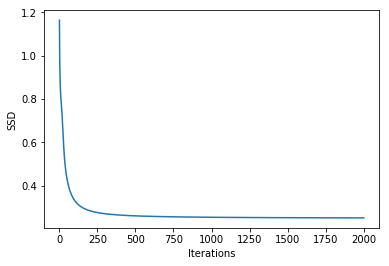

In [4]:
iterations = 2000
n_unit = 1
if __name__ == "__main__": 
    
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[0],[0],[1]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print('Loss value when number of interations is 10:', SSD[9])
    print('Loss value when number of interations is 50:', SSD[49])
    print('Loss value when number of interations is 100:', SSD[99])
    print('Loss value when number of interations is 500:', SSD[499])
    print('Loss value when number of interations is 2000:', SSD[1999])


# In task1, we didn't observe the same results because the weights are created randomly. And the loss values are decreasing as the number of iterations increases.

# Task 2

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50441338]
 [0.65772237]
 [0.6577229 ]
 [0.6602803 ]]
Loss value when number of interations is 2000: 0.9247105237675957


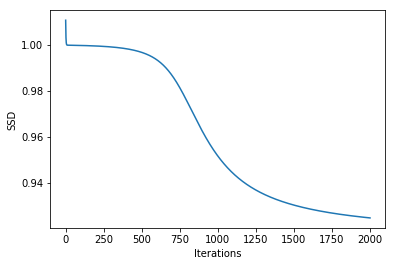

In [7]:
iterations = 2000
n_unit = 1 # n_unit = 2,5,10,50
if __name__ == "__main__": 
    
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[1],[1],[0]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print('Loss value when number of interations is 2000:', SSD[1999])

# In task2, the AND operator has lower loss values when the n_unit = 1. For XOR operator we got bad results beacause we can't classficate the data by only one neuron. When we increase the number of neuros in hidden layers, the results are improved until a certain number of neurons like 10. But when it keep increasing, the results would be worse when n_unit=50.

# Task 3

In [8]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 50 # n_unit = 1, 2, 4, 16, 25, 50

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer = SGD(lr=0.1),
              metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 5000, verbose=0)

print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.04599702]
 [0.97463274]
 [0.9749317 ]
 [0.01920033]]


The results before changing learning rate:

n_unit = 1 : The predicted class labels are: [[0.5006155]
 [0.5006155]
 [0.5006155]
 [0.5006155]]

n_unit = 2 : The predicted class labels are: [[0.4742636]
 [0.6396791]
 [0.4742636]
 [0.4742636]]

n_unit = 4 : The predicted class labels are: [[0.48214462]
 [0.50296855]
 [0.5363879 ]
 [0.56410927]]

n_unit = 16 : The predicted class labels are: [[0.4812355 ]
 [0.5457571 ]
 [0.50322366]
 [0.55496365]]

n_unit = 25 : The predicted class labels are: [[0.4812355 ]
 [0.5457571 ]
 [0.50322366]
 [0.55496365]]

n_unit = 50 : The predicted class labels are: [[0.47832686]
 [0.5361162 ]
 [0.5580305 ]
 [0.5018328 ]]
 
The results after setting learning rate = 0.1:
 
 n_unit = 1 : The predicted class labels are: [[0.3339834 ]
 [0.3339834 ]
 [0.97950935]
 [0.3339834 ]]
 
 n_unit = 2 : The predicted class labels are: [[0.33395112]
 [0.9801624 ]
 [0.33395112]
 [0.33395112]]
 
 n_unit = 4 : The predicted class labels are: [[0.04050305]
 [0.97592765]
 [0.9760733 ]
 [0.02017644]]
 
 n_unit = 16 : The predicted class labels are: [[0.04236481]
 [0.9741006 ]
 [0.9739702 ]
 [0.02136591]]
 
 n_unit = 25 : The predicted class labels are: [[0.04128468]
 [0.97560155]
 [0.9754395 ]
 [0.01936913]]
 
 n_unit = 50 : The predicted class labels are: [[0.04492968]
 [0.9754776 ]
 [0.9756963 ]
 [0.01726386]]
 
 # In conclusion, we can see that if we don't change the default learning rate, the results would not be effective. After we changed the learning rate to 0.1, the results improved and we got quiet good results when we increase the n_unit to 4. However, if n_unit keeps increasing, the results won't improve futher. 